# Four helpful plots to visualize the results of your CRISPR screen

The data used for this visualization comes from the results of running MAGeCK comparing the negative screen to the control library as published with the following preprint: [Human sialomucin CD164 is an essential entry factor for lymphocytic choriomeningitis virus](https://www.biorxiv.org/content/10.1101/2022.01.24.477570v1). Data is available on NCBI BioProjects under accession ID PRJNA806912.

## Getting Started

After running the MAGeCK test subcommand to evaluate the enrichment score, significance, and rank of your sgRNAs when compared to the controls, you should have the following files:
* a sgrna_summary.txt
* a gene_summary.txt

We are going to use those two files to make some visualizations to better help us understand the results of our screen. MAGeCK itself will output a pdf that has a few visualizations, however, we want to be able to make our own such that we can customize the colors and the genes on which we want to focus our attention.

We can get started by importing these files.

In [14]:
# Import necessary libraries for working with math, dataframes, and plotting for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
sns.set_style("white")

In [5]:
# Import your sgRNA summary file as a dataframe
# Edit the following import commands to the location of your file of interest
# Note that these files are TSVs (tab-separated values)
df_gene = pd.read_csv('/PATH/TO/FILE/gene_summary.txt', sep='\t')

# If you have a TSV file, run:
df_sgRNA = pd.read_csv('/PATH/TO/FILE/sgRNA_summary.txt', sep='\t')

## 1. Plotting the Distribution of Enrichment Scores

In this particular screen, we are intersted in looking at the positive ranking. First we want to plot the distribution of enrichment scores, and we want to plot this on a log scale.

In [84]:
#log transform the score (also known as the enrichment score)
df_gene['plot_pos|score']=-np.log10(df_gene['pos|score'])

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc,plot_pos|score,plot_pos|p-value,plot_pos|fdr,plot_neg|score,plot_neg|p-value,plot_neg|fdr
0,ATP6V1B2,6,0.973940,0.974030,0.999851,21131,0,1.65040,5.078900e-16,2.281500e-07,0.000450,1,5,1.65040,15.294230,6.641780,3.346787,0.011468,0.011428,0.000065
1,ATP6V0C,6,1.000000,1.000000,1.000000,21698,0,1.59770,6.593500e-13,2.281500e-07,0.000450,2,6,1.59770,12.180884,6.641780,3.346787,-0.000000,-0.000000,-0.000000
2,ATP6V0B,6,1.000000,1.000000,1.000000,21697,0,2.07160,1.311600e-12,2.281500e-07,0.000450,3,6,2.07160,11.882199,6.641780,3.346787,-0.000000,-0.000000,-0.000000
3,ATP6V1G1,6,0.997530,0.997560,1.000000,21644,0,1.71350,1.137700e-10,2.281500e-07,0.000450,4,6,1.71350,9.943972,6.641780,3.346787,0.001074,0.001061,-0.000000
4,SYS1,6,0.475720,0.657760,0.997916,13898,1,0.87154,1.574300e-09,2.281500e-07,0.000450,5,5,0.87154,8.802913,6.641780,3.346787,0.322649,0.181933,0.000906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21693,CACYBP,6,0.000222,0.001195,0.990781,23,6,-0.72037,9.997800e-01,9.997700e-01,0.999947,21694,0,-0.72037,0.000096,0.000100,0.000023,3.652826,2.922523,0.004022
21694,MRPL18,6,0.000185,0.001016,0.990781,18,6,-0.88417,9.998200e-01,9.998100e-01,0.999947,21695,0,-0.88417,0.000078,0.000083,0.000023,3.732899,2.992935,0.004022
21695,ZCRB1,6,0.000093,0.000510,0.971947,9,6,-1.02320,9.999100e-01,9.999100e-01,0.999985,21696,0,-1.02320,0.000039,0.000039,0.000007,4.030053,3.292489,0.012357
21696,RARG,6,0.000062,0.000337,0.971947,5,6,-0.97226,9.999400e-01,9.999400e-01,0.999985,21697,0,-0.97226,0.000026,0.000026,0.000007,4.204196,3.472396,0.012357


<Figure size 720x720 with 0 Axes>

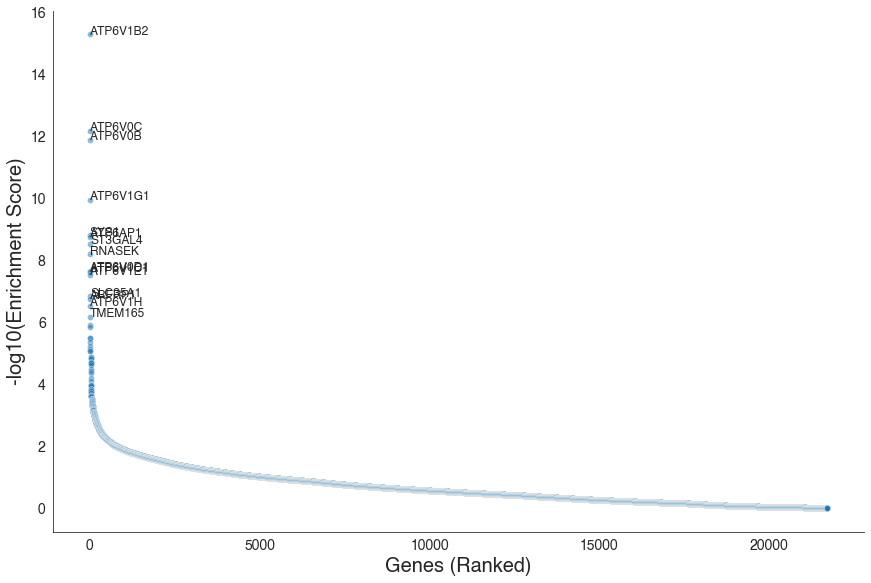

In [27]:
# Set up the figure
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14, 'font.family': 'helvetica'})

# Plot the genes in order, with the y-axis showing the enrichment score
grid = sns.relplot(x=df_gene.index, y='plot_pos|score', data=df_gene,
                   alpha=0.5,height=8, aspect=1.5)
grid.set(xlim=(None, None), ylim=(None, None))
axes = grid.fig.axes

# Set up the labels for the figure
plt.xlabel('Genes (Ranked)', fontsize=20)
plt.ylabel('-log10(Enrichment Score)', fontsize=20)
# Label the genes of interest (top 15)
texts=[plt.text(x=df_gene.index[i], y=df_gene['plot_pos|score'][i], s=df_gene['id'][i], fontsize=12,
                    rotation=0) for i in range(0, 15)] 

plt.show()

Here we can actually clearly see a point in which the enrichment score sharply levels off around the -log(enrichment score) = 3. This actually represents very, very few genes of interest. Each screen will look different in terms of at what enrichment score does the graph level off, and you would want to set a threshold accordingly.

<Figure size 720x720 with 0 Axes>

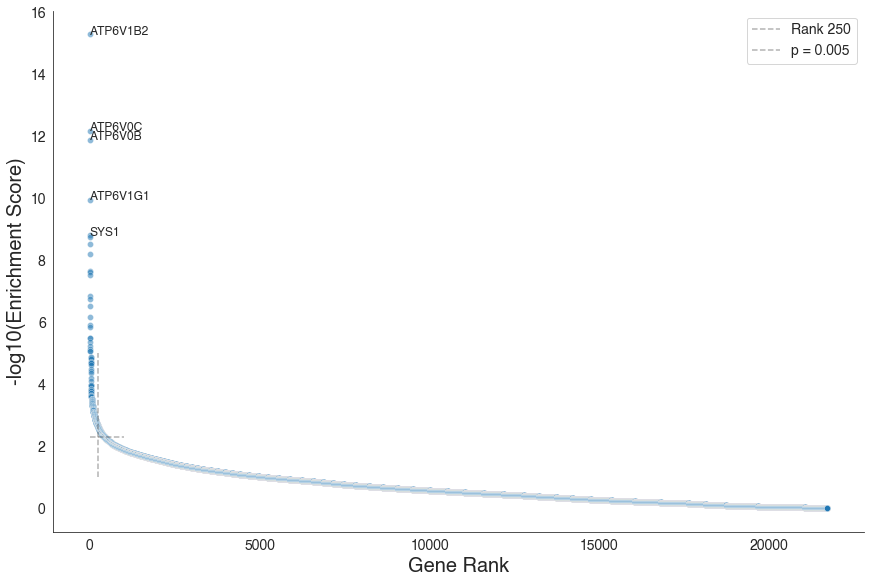

In [52]:
# Determine your rank threshold
rank_threshold = 250
# Determine your enrichment threshold
enrichment_threshold = 0.005

# Set up the figure
plt.figure(figsize=(10,10))

# Plot the genes in order, with the y-axis showing the enrichment score
grid = sns.relplot(x=df_gene.index, y='plot_pos|score', data=df_gene,
                   alpha=0.5,height=8, aspect=1.5)
grid.set(xlim=(None, None), ylim=(None, None))
axes = grid.fig.axes
# Draw lines at the top 250 gene and -log(enrichment score) = 2.7
axes[0].plot([rank_threshold, rank_threshold], [1, 5], 'k--', alpha=0.3, label='Rank ' + str(rank_threshold))
axes[0].plot([0, 1000], [-np.log10(enrichment_threshold), -np.log10(enrichment_threshold)], 
             'k--', alpha=0.3, label='p = ' + str(enrichment_threshold))

# Set up the labels for the figure
plt.xlabel('Gene Rank', fontsize=20)
plt.ylabel('-log10(Enrichment Score)', fontsize=20)
# Label the genes of interest (top 5)
texts=[plt.text(x=df_gene.index[i], y=df_gene['plot_pos|score'][i], s=df_gene['id'][i], fontsize=12,
                    rotation=0) for i in range(0, 5)]
plt.legend()
plt.show()

We can see for this particular screen, the cutoff perhaps should be drawn around -log(enrichment score) = 2.7, which would include the first 250 or so genes.

## 2. Plotting the Enrichment Score Alphabetically

Another plot we commonly see is one that allows us to visualize the different genes that have a high -log(enrichment score). By plotting the x-axis based on gene name, we can more easily see which genes are significant hits since the highly enriched (or depleted) genes will tend to be more spread apart.

In [38]:
# Reorder the dataframe alphabetically
df_gene_alpha = df_gene.sort_values(by='id')
df_gene_alpha = df_gene_alpha.reset_index()

<Figure size 720x720 with 0 Axes>

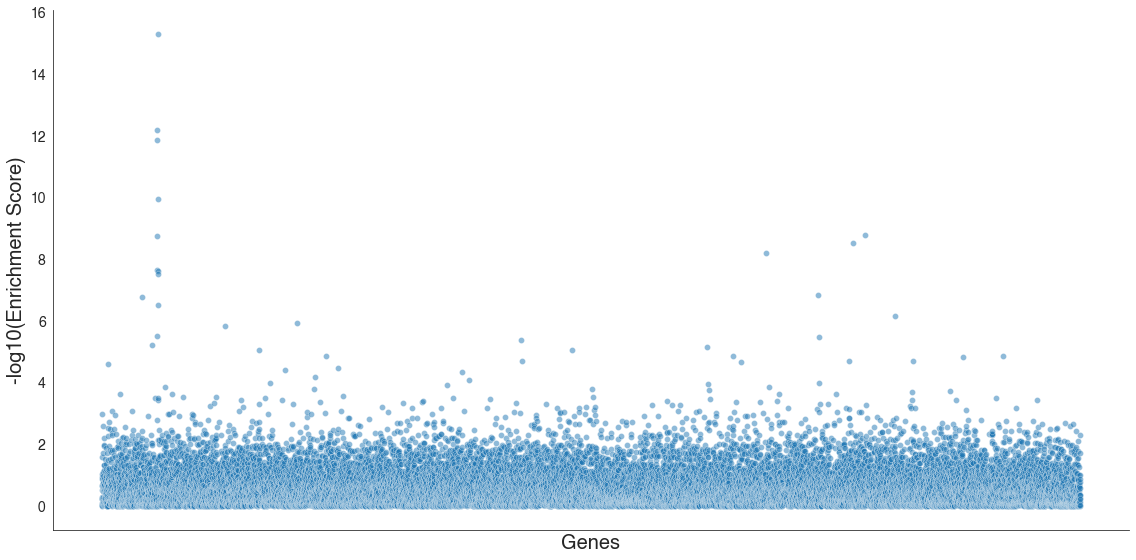

In [55]:
# Set up the figure
plt.figure(figsize=(10,10))

# Plot the genes in order, with the x-axis being in the new alphabetical order
grid = sns.relplot(x=df_gene_alpha.index, y='plot_pos|score', data=df_gene_alpha,
                   legend=True, alpha=0.5,height=8, aspect=2)
grid.set(xlim=(None, None), ylim=(None, None))
axes = grid.fig.axes

# Set up the labels for the figure
plt.xlabel('Genes', fontsize=20)
plt.xticks([])
plt.ylabel('-log10(Enrichment Score)', fontsize=20)

plt.tight_layout()
plt.show()

In this case, we can set up a threshold here as well. We can 1) draw a horizontal line at the threshold to determine how we call hits, 2) color them differently to signify their importance, and 3) label the points of interest with the gene names. This is also useful for later downstream figure making.

<Figure size 720x720 with 0 Axes>

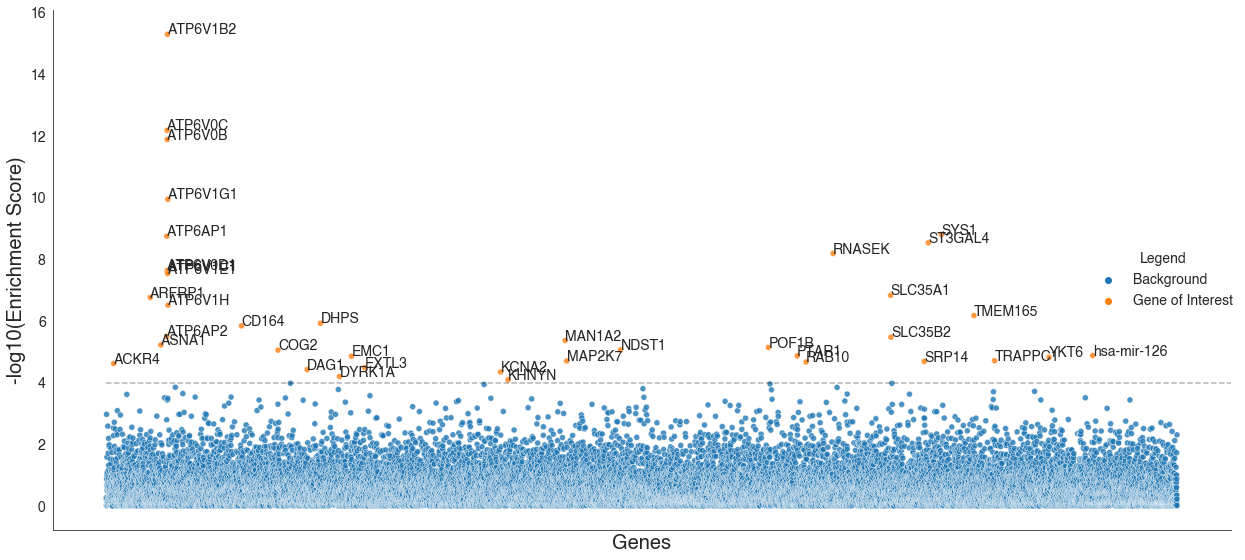

In [74]:
# Determine your enrichment threshold
threshold = 4

# Set up the figure
plt.figure(figsize=(10,10))

# Plot the genes in order, with the x-axis being in the new alphabetical order
grid = sns.relplot(x=df_gene_alpha.index, y='plot_pos|score', data=df_gene_alpha,
                   hue=df_gene_alpha['plot_pos|score']>threshold,
                   legend=True, alpha=0.8,height=8, aspect=2)
grid.set(xlim=(None, None), ylim=(None, None))
axes = grid.fig.axes
# Plot horizontal line depicting the threshold
axes[0].plot([0, df_gene_alpha.size], [threshold, threshold], 'k--', alpha=0.3, label='Rank ' + str(rank_threshold))

# Set up the labels for the figure
plt.xlabel('Genes', fontsize=20)
plt.xticks([])
plt.ylabel('-log10(Enrichment Score)', fontsize=20)

texts=[plt.text(x=i, 
                y=df_gene_alpha.loc[df_gene_alpha['plot_pos|score']>threshold]['plot_pos|score'][i],
                s=df_gene_alpha.loc[df_gene_alpha['plot_pos|score']>threshold]['id'][i])
        for i in df_gene_alpha.loc[df_gene_alpha['plot_pos|score']>threshold].index]

# Set up legend
grid._legend.set_title('Legend')
# replace labels
new_labels = ['Background', 'Gene of Interest']
for t, l in zip(grid._legend.texts, new_labels):
    t.set_text(l)
    
plt.tight_layout()
plt.show()

## 3. Plotting a Volcano Plot

A volcano plot generally plots log fold chance (LFC) on the x-axis and some significance value (p-value or enrichment value) on the y-axis. In traditional gene expression datasets, this generally forms a plot that looks like a volcano exploding: low significance and low log-fold chance at a high density, and few high significance and high log-fold change (both extreme positive and extreme negatives) points spread out on the edges.

With MAGeCK, however, because the significance was calculated based on whether the enrichment was a positive or negative enrichment (that is why there are "pos|" and "neg|" headers), our volcano plot doesn't look much like a volcano. However it is still an important plot to know how to make.

<Figure size 720x720 with 0 Axes>

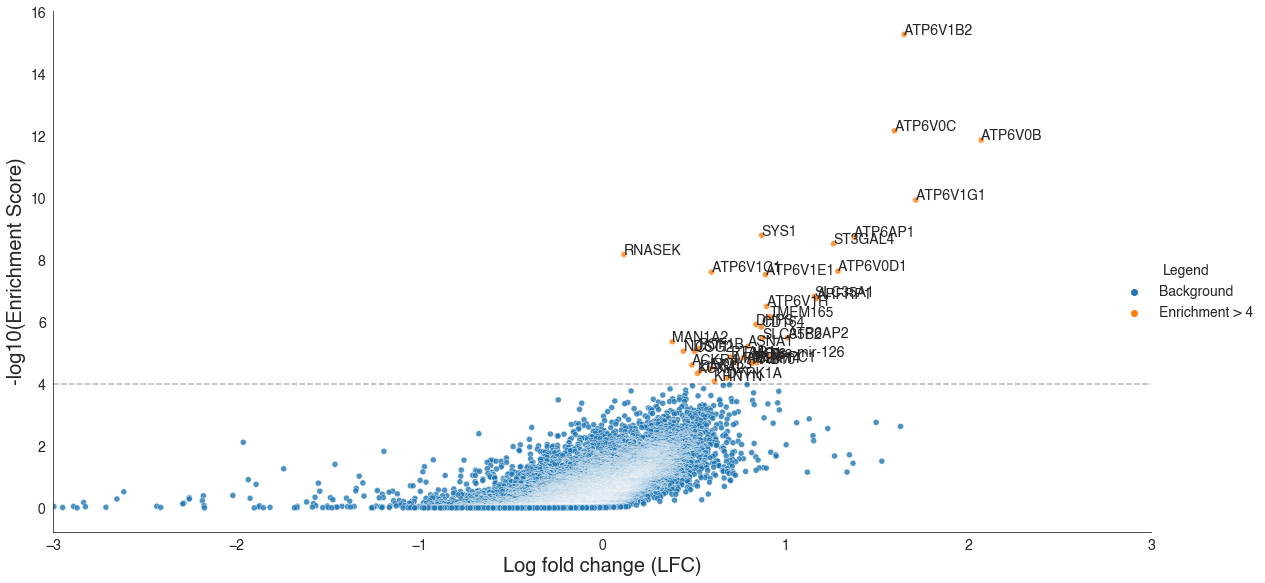

In [115]:
# Determine your thresholds
enrichment_threshold = 4

# Set up the figure
plt.figure(figsize=(10,10))

# Plot the genes in order, with the x-axis being in the new alphabetical order
grid = sns.relplot(x='pos|lfc', y='plot_pos|score', data=df_gene,
                   hue=(df_gene['plot_pos|score']>enrichment_threshold),
                   legend=True, alpha=0.8,height=8, aspect=2)
# Constrain the plot
grid.set(xlim=(-3, 3), ylim=(None, None))
axes = grid.fig.axes
# Plot horizontal line depicting the threshold
axes[0].plot([-3, 3], [enrichment_threshold, enrichment_threshold], 'k--',
             alpha=0.3, label='Rank ' + str(rank_threshold))



# Set up the labels for the figure
plt.xlabel('Log fold change (LFC)', fontsize=20)
plt.ylabel('-log10(Enrichment Score)', fontsize=20)

texts=[plt.text(x=df_gene.loc[df_gene['plot_pos|score']>enrichment_threshold]['pos|lfc'][i], 
                y=df_gene.loc[df_gene['plot_pos|score']>enrichment_threshold]['plot_pos|score'][i],
                s=df_gene.loc[df_gene['plot_pos|score']>enrichment_threshold]['id'][i])
        for i in df_gene.loc[df_gene['plot_pos|score']>enrichment_threshold].index]

# Set up legend
grid._legend.set_title('Legend')
# replace labels
new_labels = ['Background', 'Enrichment > ' + str(enrichment_threshold)]
for t, l in zip(grid._legend.texts, new_labels):
    t.set_text(l)
    

But perhaps we want to also look at the genes that are below the enrichment threshold but have a unusually high value for log fold change? We can set a second threshold for the log fold change value.

<Figure size 720x720 with 0 Axes>

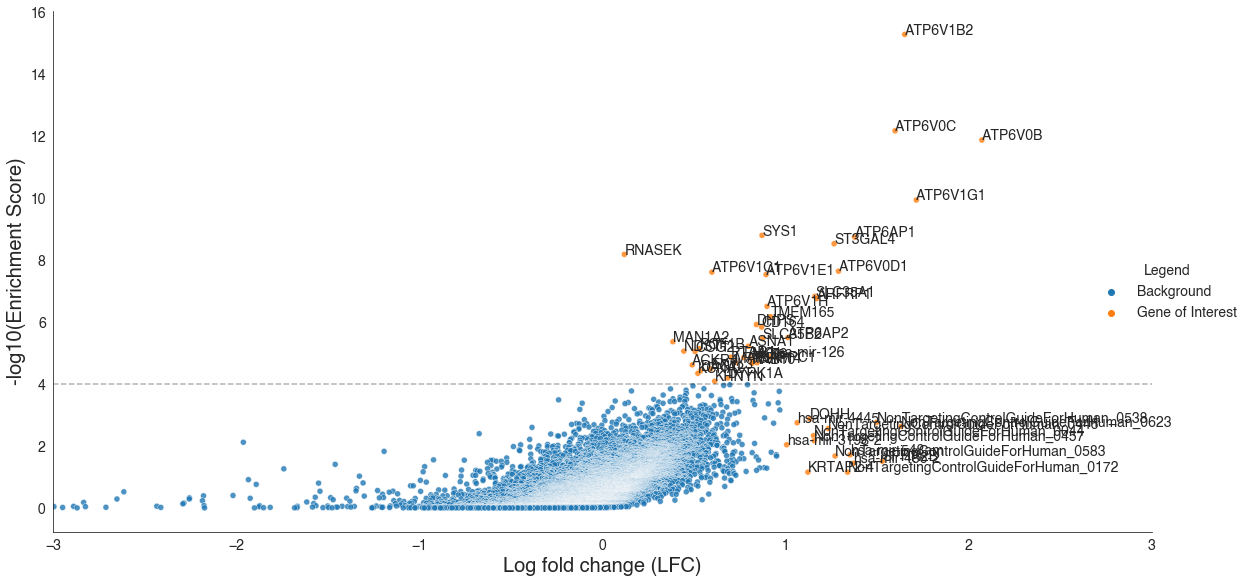

In [117]:
# Determine your thresholds
enrichment_threshold = 4
lfc_threshold = 1

# Set up the figure
plt.figure(figsize=(10,10))

# Plot the genes in order, with the x-axis being in the new alphabetical order
grid = sns.relplot(x='pos|lfc', y='plot_pos|score', data=df_gene,
                   hue=(df_gene['plot_pos|score']>enrichment_threshold) | (df_gene['pos|lfc']>lfc_threshold),
                   legend=True, alpha=0.8,height=8, aspect=2)
# Constrain the plot
grid.set(xlim=(-3, 3), ylim=(None, None))
axes = grid.fig.axes
# Plot horizontal line depicting the threshold
axes[0].plot([-3, 3], [enrichment_threshold, enrichment_threshold], 'k--',
             alpha=0.3, label='Rank ' + str(rank_threshold))



# Set up the labels for the figure
plt.xlabel('Log fold change (LFC)', fontsize=20)
plt.ylabel('-log10(Enrichment Score)', fontsize=20)

texts=[plt.text(x=df_gene.loc[(df_gene['plot_pos|score']>enrichment_threshold) | (df_gene['pos|lfc']>lfc_threshold)]['pos|lfc'][i], 
                y=df_gene.loc[(df_gene['plot_pos|score']>enrichment_threshold) | (df_gene['pos|lfc']>lfc_threshold)]['plot_pos|score'][i],
                s=df_gene.loc[(df_gene['plot_pos|score']>enrichment_threshold) | (df_gene['pos|lfc']>lfc_threshold)]['id'][i])
        for i in df_gene.loc[(df_gene['plot_pos|score']>enrichment_threshold) | (df_gene['pos|lfc']>lfc_threshold)].index]

# Set up legend
grid._legend.set_title('Legend')
# replace labels
new_labels = ['Background', 'Gene of Interest']
for t, l in zip(grid._legend.texts, new_labels):
    t.set_text(l)
    

Well in this case I take it all back. Looks like for some reason a lot of my non-targeting controls and some miRNA are highly enriched, unfortunately. In any case, it's good to know how to make these plots, but for this particular screen, it was not especially useful.

## 4. Plotting Fold Enrichment of Top Guides 

First, what we want to do here is visualize how distributed are all of our guides in terms of fold-enrichment. We would expect that most guides will not change much in abundance due to our perturbation. The only guides we expect high degree of enrichment are the guides to genes that we have called a hit. That is to say, for each gene hit, we would expect our visualization to show that the sgRNAs that targeted the gene of interest demonstrate an enrichment beyond what would have been expected from an average guide in this screen.

Text(0, 0.5, 'Density')

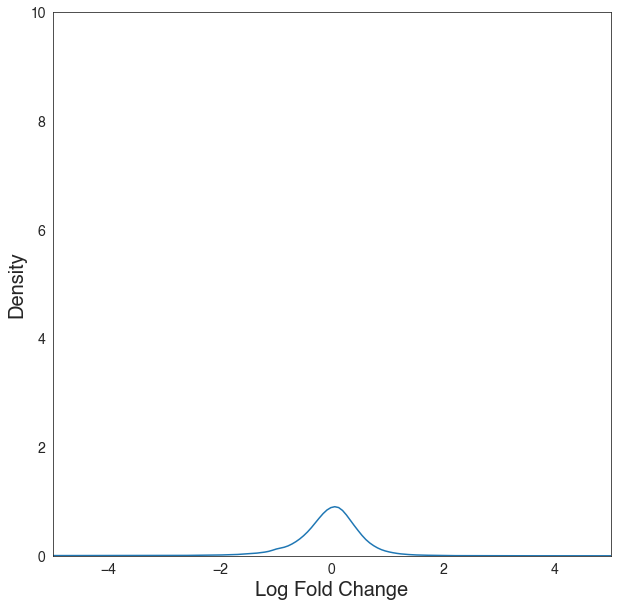

In [65]:
# Set up the figure
plt.figure(figsize=(10,10))

# Plot the Kernel density estimation (KDE) of the sgRNAs in terms of the log fold change (LFC)
sns.kdeplot(data=df_sgRNA, x='LFC')

# Frame the figure
plt.xlim(xmin=-5, xmax=5)
plt.ylim(ymin=0, ymax=10)

# Set up the labels for the figure
plt.xlabel('Log Fold Change', fontsize=20)
plt.ylabel('Density', fontsize=20)

Overlayed on this plot, we want to add something like the top 10 genes of interest. First we have to figure out what those genes are, and then we want to identify each of the sgRNA that target those 10 genes. From that, plot the LFC of each sgRNA for each of the top 10 genes of interest.

In [66]:
# Find the top 10 gene hits
df_gene.head(10)

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc,plot_pos|score,plot_pos|p-value,plot_pos|fdr
0,ATP6V1B2,6,0.97394,0.97403,0.999851,21131,0,1.65040,5.078900e-16,2.281500e-07,0.00045,1,5,1.65040,15.294230,6.64178,3.346787
1,ATP6V0C,6,1.00000,1.00000,1.000000,21698,0,1.59770,6.593500e-13,2.281500e-07,0.00045,2,6,1.59770,12.180884,6.64178,3.346787
2,ATP6V0B,6,1.00000,1.00000,1.000000,21697,0,2.07160,1.311600e-12,2.281500e-07,0.00045,3,6,2.07160,11.882199,6.64178,3.346787
3,ATP6V1G1,6,0.99753,0.99756,1.000000,21644,0,1.71350,1.137700e-10,2.281500e-07,0.00045,4,6,1.71350,9.943972,6.64178,3.346787
4,SYS1,6,0.47572,0.65776,0.997916,13898,1,0.87154,1.574300e-09,2.281500e-07,0.00045,5,5,0.87154,8.802913,6.64178,3.346787
5,ATP6AP1,6,0.52913,0.69322,0.997916,14676,1,1.37730,1.789100e-09,2.281500e-07,0.00045,6,5,1.37730,8.747365,6.64178,3.346787
6,ST3GAL4,6,0.92289,0.92374,0.998760,20023,1,1.26480,2.928700e-09,2.281500e-07,0.00045,7,5,1.26480,8.533325,6.64178,3.346787
7,RNASEK,6,0.33858,0.55210,0.997916,11519,3,0.12000,6.464100e-09,2.281500e-07,0.00045,8,3,0.12000,8.189492,6.64178,3.346787
8,ATP6V0D1,6,0.99988,0.99988,1.000000,21690,0,1.28890,2.258300e-08,2.281500e-07,0.00045,9,6,1.28890,7.646218,6.64178,3.346787
9,ATP6V1C1,6,0.98443,0.98456,0.999851,21352,0,0.59781,2.424000e-08,2.281500e-07,0.00045,10,5,0.59781,7.615467,6.64178,3.346787


In [138]:
# Set the top 10 genes
top_genes = 10
genelist = df_gene.id.head(top_genes)

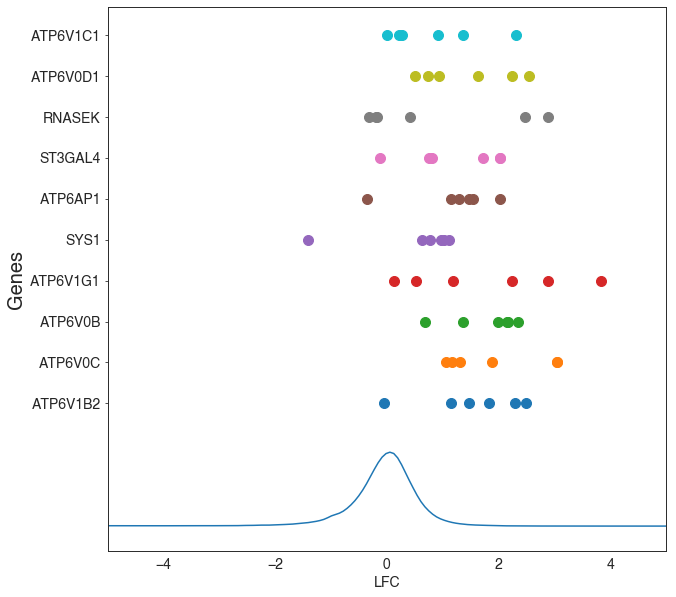

In [191]:
# Plot the sgRNA's individual log fold change
fig, ax = plt.subplots(figsize=(10,10))
plot_list = [1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5]

# Plot sgRNA
for i in range(0,len(genelist)):
    plt.scatter(x=df_sgRNA[df_sgRNA['Gene'] == genelist[i]]['LFC'], y=np.ones(6)*list[i], s=100)
# Label figure1
plt.yticks(plot_list, labels=genelist)
plt.ylabel('Genes', fontsize=20)


# Plot density
ax2 = ax.twinx()
sns.kdeplot(data=df_sgRNA, x='LFC', ax=ax)
# Label figure2
plt.xlabel('Log Fold Change', fontsize=20)
plt.yticks([])
           
           
# Limit the figure
plt.xlim(xmin=-5, xmax=5)
plt.ylim(ymin=0, ymax=10)

# Set up legend
grid._legend.set_title('Legend')
# replace labels
new_labels = ['Background', 'Gene of Interest']
for t, l in zip(grid._legend.texts, new_labels):
    t.set_text(l)

plt.show()

This allows us to be able to visualize the log fold change enrichments of the sgRNA that targets the top hits from this screen.

## Other useful functions

### Plotting with p-value or false discovery rates

In this tutorial, we explored how to make all of these plots using the MAGeCK enrichment score. However, all of these plots can be made using the calculated p-values or even the false-discovery rate. Instead of plotting with the -log10(enrichment score), you can optionally replace each of those with the -log10(p-value) or -log10(fdr).

In [92]:
# Preparing to plot with pos|p-value or pos|fdr
df_gene['plot_pos|p-value']=-np.log10(df_gene['pos|p-value'])
df_gene['plot_pos|fdr']=-np.log10(df_gene['pos|fdr'])

# Preparing to plot with neg|score, neg|p-value, or neg|fdr
df_gene['plot_neg|score']=-np.log10(df_gene['neg|score'])
df_gene['plot_neg|p-value']=-np.log10(df_gene['neg|p-value'])
df_gene['plot_neg|fdr']=-np.log10(df_gene['neg|fdr'])

Another useful thing to be able to do is to look up specific genes of interest. Did you already have a gene in mind and you want to see how well it ranks in this screen? You will want to be able to search through your database to find your specific gene then. Here is one way of doing so.

### Search for your gene of interest

In [134]:
# Search for your gene of interest in the df_gene dataframe
gene_of_interest = 'DAG1'
df_gene[df_gene['id'].str.match(gene_of_interest, na=False)]

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc,plot_pos|score,plot_pos|p-value,plot_pos|fdr,plot_neg|score,plot_neg|p-value,plot_neg|fdr
34,DAG1,6,0.99834,0.99836,1.0,21655,0,0.53501,0.000038,0.000227,0.141018,35,6,0.53501,4.419451,3.643076,0.850725,0.000722,0.000713,-0.0


In [135]:
# Search for your gene of interest in the df_sgRNA dataframe
gene_of_interest = 'DAG1'
df_sgRNA[df_sgRNA['Gene'].str.match(gene_of_interest, na=False)]

,sgrna,Gene,control_count,treatment_count,control_mean,treat_mean,LFC,control_var,adj_var,score,p.low,p.high,p.twosided,FDR,high_in_treatment
2198,HGLibA_12291,DAG1,1350.900,2021.10,1350.900,2021.10,0.58090,224600.0,17135.00,5.12010,1.00000,1.527100e-07,3.054200e-07,0.000017,True
6332,HGLibA_12293,DAG1,1196.700,1680.10,1196.700,1680.10,0.48913,116830.0,14993.00,3.94780,0.99996,3.943700e-05,7.887500e-05,0.001505,True
8139,HGLibB_12280,DAG1,155.570,301.76,155.570,301.76,0.95136,10686.0,1585.40,3.67150,0.99988,1.205800e-04,2.411600e-04,0.003580,True
13819,HGLibB_12279,DAG1,52.271,120.51,52.271,120.51,1.18960,2328.3,477.89,3.12150,0.99909,9.072000e-04,1.814400e-03,0.015833,True
17012,HGLibB_12278,DAG1,777.850,1057.60,777.850,1057.60,0.44274,39131.0,9326.30,2.89680,0.99812,1.884900e-03,3.769800e-03,0.026778,True
81930,HGLibA_12292,DAG1,418.170,473.55,418.170,473.55,0.17903,1533.5,4707.70,0.80715,0.79021,2.097900e-01,4.195800e-01,0.618870,True


### Exporting plots

Finally, you may want to save the plots you have produced. One way is to simply copy and paste the plots. However, these will be in JPG and you may lose resolution depending on how you set up the figure sizes. To be able to export these plots into PDF for you to take downstream into Adobe Illustrator, Affinity Designer, or another image editor, you will want to specifically export your plot as a PDF by adding the following code to your plots:

In [ ]:
# Add right before the plt.show()
plt.savefig('test.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False,
        frameon=None, metadata=None)
plt.rcParams['pdf.fonttype'] = 42

## Summary

Hopefully these plots help you find some new insights into the screening data you are looking at beyond simply observing what what are top hits by rank. Don't get me wrong, that is absolutely the place to start, but the data is far richer than simply looking at one number. Hopefully this tutorial helped you make the plots you needed to make those observations yourself.

While the majority of these plots are susufficient quality to share, it is important to note that in most screening plots, there will be clusters of points where it is difficult to see how many genes are represented and, if the plot is labeled, which genes are representated. I strongly advice you to export the plots of interest and edit them accordingly elsewhere for clarity (as well as better color choices).

Once again, you can find the original data used for this visualization on NCBI BioProjects under accession ID PRJNA806912.